# WebScrape: Multiple Text Files from HTML Page Links

We want to download all the data files that are provided on the website. 

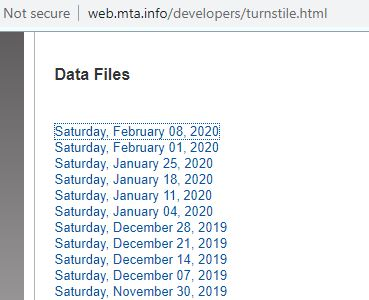

In [1]:
from IPython.display import Image
Image("Capture.JPG")

## Install and import the libraries 

In [2]:
!pip install "ipython-beautifulsoup[bs4]"

In [3]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

## Set the URL you want to webscrape from

In [4]:
url = 'http://web.mta.info/developers/turnstile.html'

## Connect to the URL

In [5]:
response = requests.get(url)
response

<Response [200]>

## Parse HTML and save to BeautifulSoup object

In [6]:
soup = BeautifulSoup(response.text, "html.parser")
#soup

## To locate all 'a' tags

In [7]:
soup.findAll('a')

[<a href="#main-content">Skip to main content</a>,
 <a href="http://www.mta.info"><img alt="Go to MTA homepage" src="/template/images/mta_info.gif"/></a>,
 <a href="https://new.mta.info/accessibility">Accessibility</a>,
 <a href="http://assistive.usablenet.com/tt/http://www.mta.info">Text-only</a>,
 <a href="https://new.mta.info/customer-self-service">Customer Self-Service</a>,
 <a href="https://new.mta.info/careers">Employment</a>,
 <a href="https://new.mta.info/customer-feedback">FAQs/Contact Us</a>,
 <a href="http://www.mta.info" style="padding-left:18px;">Home</a>,
 <a href="http://www.mta.info">MTA Home</a>,
 <a href="http://www.mta.info/nyct">NYC Subways and Buses</a>,
 <a href="http://www.mta.info/lirr">Long Island Rail Road</a>,
 <a href="http://www.mta.info/mnr">Metro-North Railroad</a>,
 <a href="http://www.mta.info/bandt">Bridges and Tunnels</a>,
 <a href="https://new.mta.info/capital">MTA Capital Program</a>,
 <a href="https://new.mta.info/schedules">Schedules</a>,
 <a href

## Let's take a quick look at the very first data file, which starts on line 36

In [8]:
one_a_tag = soup.findAll('a')[36]
one_a_tag

<a href="data/nyct/turnstile/turnstile_200201.txt">Saturday, February 01, 2020</a>

## We want to extract the actual link

In [9]:
link = one_a_tag['href']
link

'data/nyct/turnstile/turnstile_200201.txt'

The full download URL is 'http://web.mta.info/developers/' + link

## To download the whole data set, let's do a for loop through all a tags

In [ ]:
line_count = 1
for one_a_tag in soup.findAll('a'): #'a' tags are for links
    if line_count >= 36: #code for text files starts at line 36
        link = one_a_tag['href']
        download_url = 'http://web.mta.info/developers/'+ link
        urllib.request.urlretrieve(download_url,'./'+link[link.find('/turnstile_')+1:]) 
        time.sleep(1)
    line_count +=1

Courtesy: https://towardsdatascience.com/how-to-web-scrape-with-python-in-4-minutes-bc49186a8460